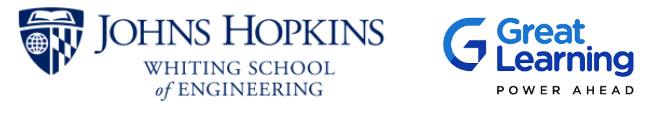

<font size=10>**Mid-term Project**</font>

<font size=6>**Your AI Email Secretary**</font>

# **Business Problem - Automating Email Prioritization & Responses**



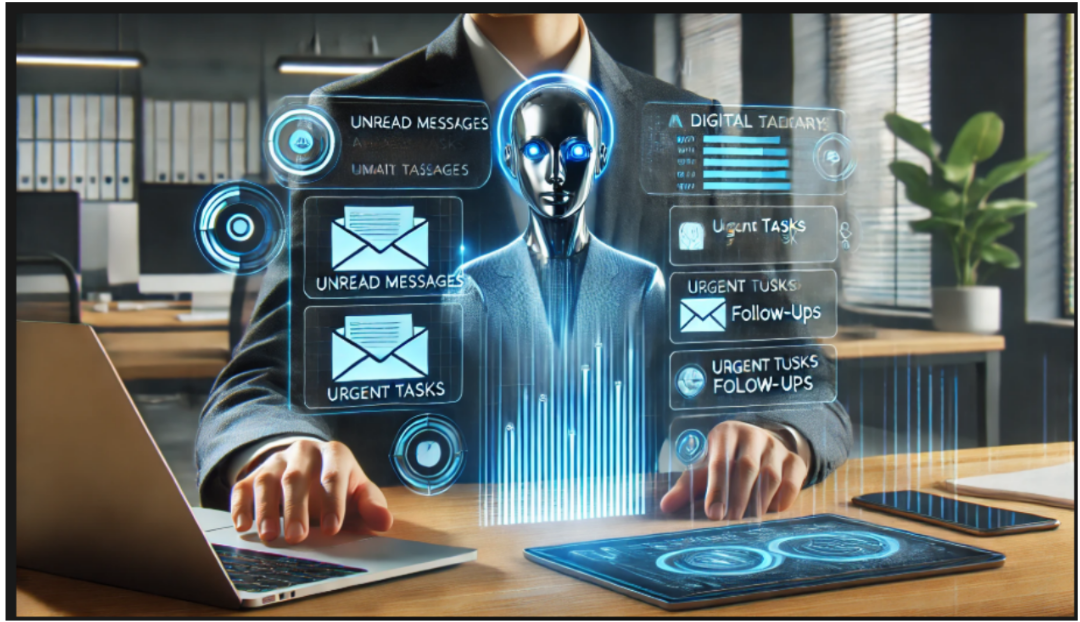

**Alex Carter**, a seasoned **Senior Manager in Software Development** at **Orion Tech Solutions**, plays a pivotal role in ensuring the smooth execution of multiple IT projects. Orion Tech Solutions, a **mid-sized IT services company**, prides itself on delivering cutting-edge software solutions to global clients, balancing innovation with operational efficiency.

With years of experience in software engineering and project management, Alex’s day is a mix of **strategic planning, problem-solving, and stakeholder coordination**. Managing a diverse portfolio of projects, Alex works closely with **internal teams, vendors, and clients**, ensuring deliverables meet expectations while navigating technical and organizational challenges.


**The Challenge**

A high-profile client has recently entrusted Orion Tech Solutions with the development of a **next-generation cloud security platform**. While the project holds immense potential for growth and recognition, it also brings **complexity, tight deadlines, and high stakeholder expectations**.

As the project nears critical milestones, Alex faces **multiple challenges:**

* Ensuring **timely delivery** while balancing **resource constraints**.
* Managing **escalations** related to security vulnerabilities discovered during testing.
* Communicating with **clients, vendors, and internal teams** to align expectations.
* Handling **unexpected system downtimes** due to scheduled IT maintenance.
* Addressing **compliance concerns** raised by the legal team on certain third-party integrations.

With multiple stakeholders relying on Alex’s leadership, **clear and effective communication** is essential. Every email, meeting, and decision made plays a role in determining the project's success.

### **The Case Study**
This case study explores the **real-world challenges** Alex encounters, highlighting how well-structured communication can help in:
1. **Crisis Management** – Handling security breaches and system outages.
2. **Client Relations** – Effectively communicating progress and addressing feedback.
3. **Team Coordination** – Ensuring alignment between development, security, and operations teams.
4. **Strategic Decision-Making** – Navigating legal, financial, and technical roadblocks.

Through **realistic scenarios and email exchanges**, we will examine how Alex can **leverage professional communication strategies** to tackle these challenges head-on, ensuring **project success and business continuity**.

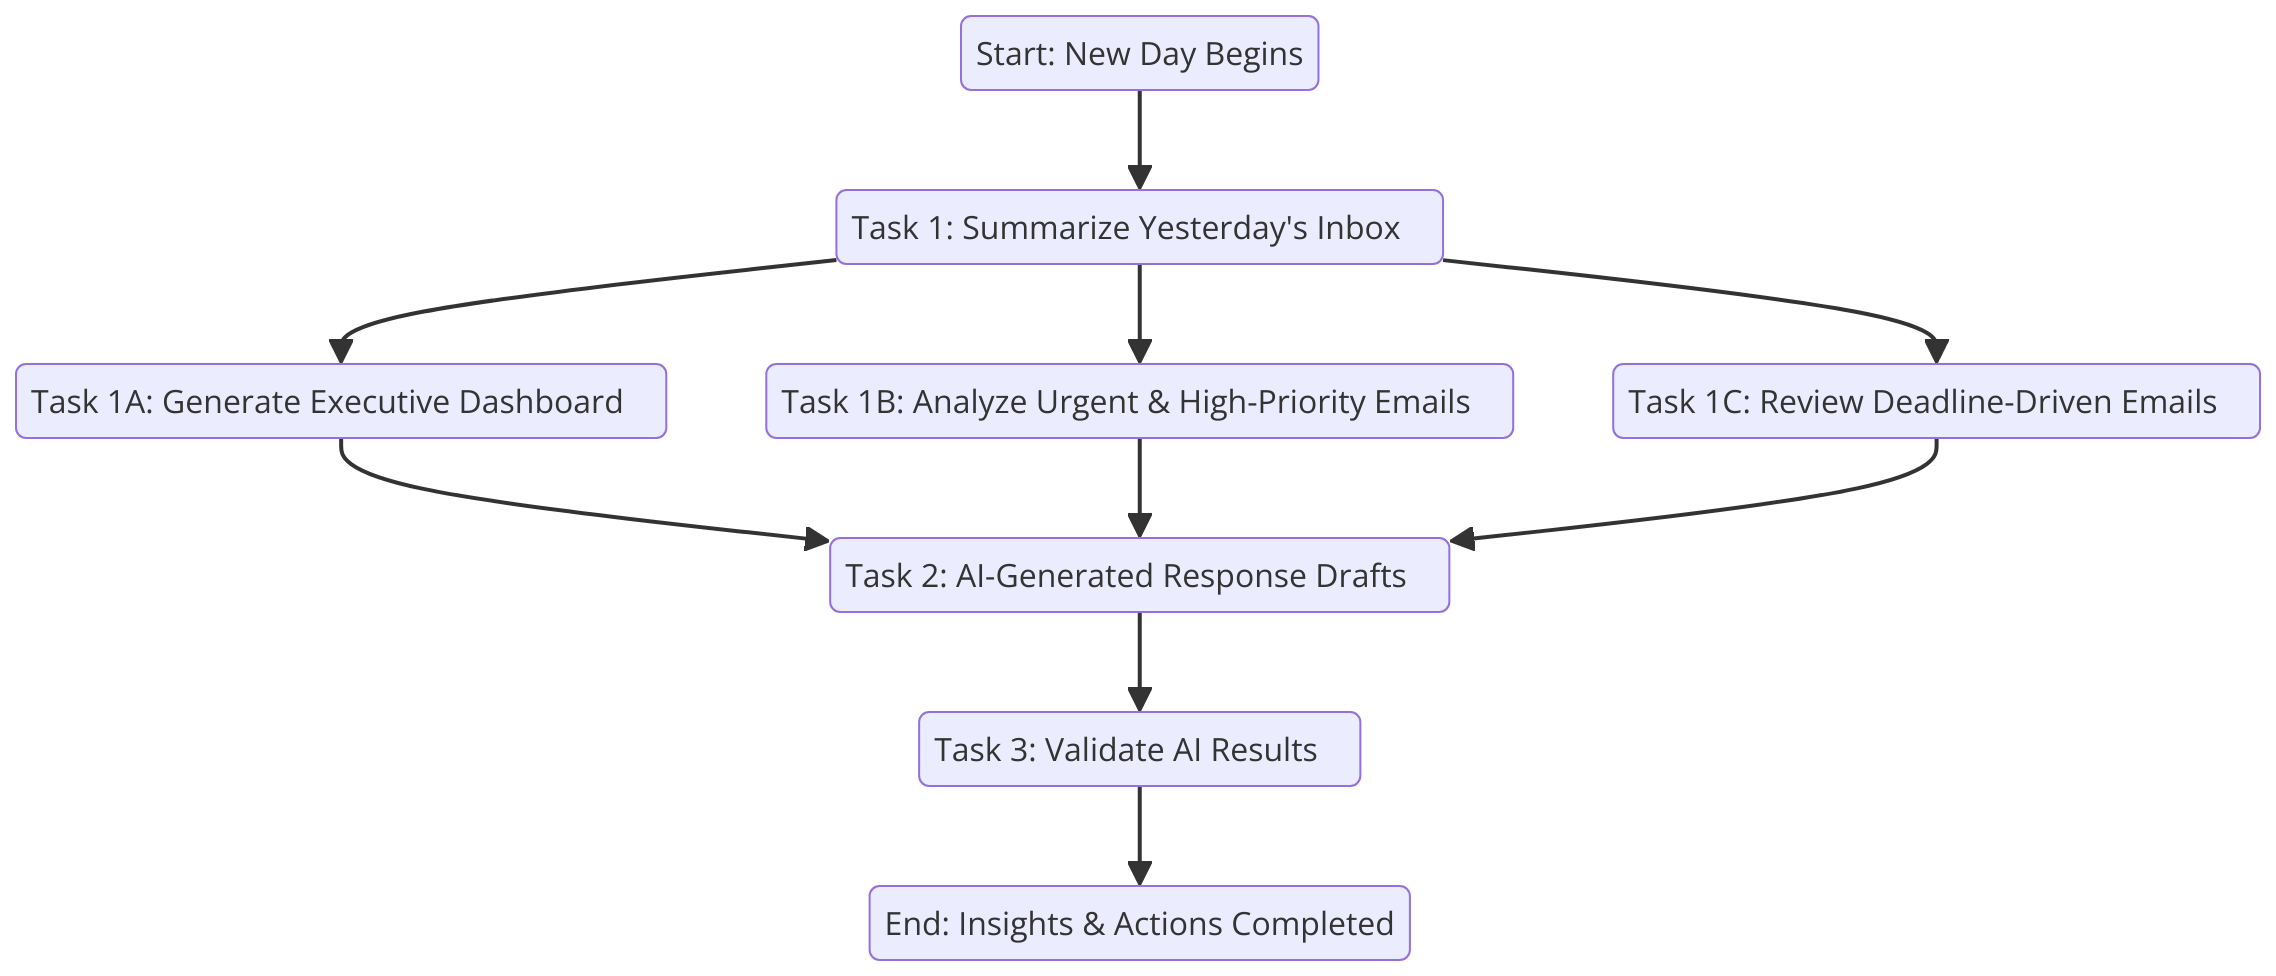

### **Objective**

The goal of this project is to create a Generative AI-powered system that:
1. **Summarize** yesterday’s emails into actionable insights. [Yesterbox Approach]
2. **Prioritizes** emails based on urgency, sender, and context.
3. **Drafts** context-aware responses, reducing manual effort.



# **LLM Setup**



In [ ]:
#!pip install -q openai==1.61.1
#pip install controlflow

- The `config.json` file should contain **API_KEY** and **API Base URL** provided by OpenAI.
- You need to insert your actual API keys and endpoint URL obtained from your Olympus account. Refer to the **OpenAI Access Token documentation** for more information on how to generate and manage your API keys.
- This code reads the `config.json` file and extracts the API details.
  - The `API_KEY` is a **unique secret key** that authorizes your requests to OpenAI's API.
  - The `OPENAI_API_BASE` is the **API Base URL** where the model will process your requests.

**What To Do?**
- Use the sample `config.json` file provided.
- Add their **OpenAI API Key** and **Base URL** to the file.
- The `config.json` should look like this:

  ```
  {
        "API_KEY": "your_openai_api_key_here",
        "OPENAI_API_BASE": "https://your_openai_api_base/v1"
      }
  ```

In [ ]:
# @title Loading the `config.json` file
import json
from IPython.display import display, Markdown


# Load the JSON file and extract values
file_name = 'configPAR.json'
with open(file_name, 'r') as file:
    config = json.load(file)
    API_KEY = config.get("API_KEY") # Loading the API Key
    OPENAI_API_BASE = config.get("OPENAI_API_BASE") # Loading the API Base Url

In [ ]:
model_name = "gpt-4o-mini"

- The API key and base URL are stored in environment variables to avoid hardcoding sensitive information in the code.
- The `OpenAI()` object helps us interact with the model for prompt generation.


In [ ]:
from openai import OpenAI
import os

# Storing API credentials in environment variables
os.environ['OPENAI_API_KEY'] = API_KEY
os.environ["OPENAI_BASE_URL"] = OPENAI_API_BASE

# Initialize OpenAI client
client = OpenAI()

# great learnign people i do it this way, but you can try the above

In [ ]:
#Pedro's way of doing open AI, igonre previous code
import os
from openai import OpenAI

# Initialize the OpenAI client
client = OpenAI(api_key=API_KEY)  # Replace with your actual API key

# Create a chat completion
completion = client.chat.completions.create(
    model=model_name,
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "Hello, how are you. are you alive?"}
    ]
)

# Print the assistant's reply
print(completion.choices[0].message.content)


Hello! I'm just a computer program, so I don't have feelings or life in the way you do. However, I'm here and ready to help you with any questions or information you need! How can I assist you today?


# WE DONT NEED LLM Function anymore

# **Data Setup**


### **Background**

**Name**: Alex Carter  
**Company**: Orion Tech Solutions (A mid-sized IT services company)  
**Role**: Senior Manager, Software Developement  

#### **About You**  
Alex oversees multiple projects related to software development and IT infrastructure. Your role involves coordinating with stakeholders, ensuring timely delivery, handling escalations, and approving critical project-related decisions. You work with internal teams, vendors, and clients, making communication a crucial part of your job.


**Objective:** Load the dataset containing email records and apply the Yesterbox approach to filter emails received on the previous day.

In [ ]:
# @title Step 1: Load the Dataset
# Data Loading

import pandas as pd
df = pd.read_csv("Alex_emails_march_04.csv", index_col="email_id", encoding='latin-1')      #Add the data file location
df


date_received             sender  \
email_id                                    
1             3/3/2025       Julia Martin   
2             3/3/2025        Fiona White   
3             3/3/2025       Samantha Lee   
4             3/3/2025        James Patel   
5             3/3/2025     David Whitmore   
6             3/3/2025        Lisa Taylor   
7             3/3/2025        Nathan Cole   
8             3/3/2025       David Kurien   
9             3/3/2025       Mark Swarlos   
10            3/3/2025        Tanya Patel   
11            3/3/2025     David Whitmore   
12            3/3/2025      Emily Johnson   
13            3/3/2025        Jake Domang   
14            3/3/2025          Bob Smith   
15            3/3/2025      George Harris   
16            3/3/2025        Anna Karvos   
17            3/3/2025     James Wildkorn   
18            3/4/2025      Mark Davidson   
19            3/3/2025     David Whitmore   
20            3/4/2025         Kevin Tran   
21            3/4/2025        Daniel Wong   
22            3/3/2025        Lisa Taylor   
23            3/4/2025    Rachel Thompson   
24            3/4/2025      Mark Davidson   
25            3/4/2025        Jake Dawson   
26            3/3/2025        Alex Carter   
27            3/3/2025      Mark Davidson   
28            3/4/2025    Rachel Thompson   
29            3/3/2025       Yelen Carter   
30            3/3/2025          Liam Ross   
31            3/3/2025      Mark Davidson   
32            3/3/2025        Ethan Brown   
33            3/3/2025        Ethan Brown   
34            3/3/2025         Rachel Lim   
35            3/3/2025          Sarah Lin   
36            3/3/2025     David Whitmore   
37            3/3/2025          Bob Smith   
38            3/3/2025       Julia Martin   
39            3/3/2025         Kevin Tran   
40            3/3/2025      John Mitchell   
41            3/3/2025  Daniel Goodpacker   
42            3/3/2025     Sarah Mitchell   
43            3/3/2025      Mark Davidson   
44            3/3/2025    Rachel Thompson   
45            3/3/2025         Sarah Kaur   
46            3/3/2025       Julia Martin   
47            3/3/2025        Olivia Chen   
48           2/26/2025          Sarah Lin   
49            3/3/2025          LuckyDraw   
50            3/3/2025         Helen Paul   
51            3/3/2025      Mark Davidson   
52            3/3/2025      John Mitchell   
53            3/4/2025         Max Jeremy   
54            3/3/2025    Dev Team, Orion   
55            3/3/2025               Alex   
56            3/3/2025         Ken Adasmo   
57            3/3/2025      Alice Johnson   
58            3/3/2025      Mark Davidson   
59            3/3/2025     Jessica Hector   
60            3/3/2025       Nathan Ellis   

                                                    subject  \
email_id                                                      
1          Approval Request: Budget Approval Needed by EOD    
2         Are Your APIs Secure? Reddit & Discord Sound t...   
3         Approval Needed: Project Scope Adjustment for ...   
4           Subject: Daily Update  Project Titan (March 3)   
5         [URGENT] Dashboard Syncing Issues  Production...   
6                         Quick Check-In  Frontend Updates   
7         Approval Request: Additional AWS Resources for...   
8           Blocking Issue Alert  Client Data Sync Failing   
9                    Daily Update  API Migration (March 3)   
10        URGENT: Approval Needed for 2-Week Extension o...   
11            System Crashing During Shift Changes  URGENT   
12                         Update  Bug Fixes & Refactoring   
13        "10X Your Dev Team's Productivity with AI  Fr...   
14                ?? Security Risk  Critical Patch Delayed   
15        Supply Chain Attacks Are Increasing  Are You ...   
16        "Revolutionary Cloud Hosting at 90% Off  ACT ...   
17        "Alex, This Rolex Would Look GREAT on Your Wri...   
18               Is Y

In [ ]:
# @title Step 2: Apply Yesterbox Filtering
# @markdown The Yesterbox approach involves processing emails from the previous day first before tackling today's emails.

# @markdown For this dataset, consider today's date as 4th March 2025.

# @markdown We filter the dataset to only include emails received on 3rd March 2025 (yesterday)
# (Yesterbox Approach)(Today: 4 march)



from datetime import datetime, timedelta

yesterday_date = pd.to_datetime("3/3/2025").strftime('%m/%d/%Y')

df['date_received'] = pd.to_datetime(df['date_received']).dt.strftime('%m/%d/%Y')

yesterday_emails = df[df['date_received'] == yesterday_date].reset_index(drop=True)
print(f"Filtered Emails Count: {len(yesterday_emails)}")


Filtered Emails Count: 51


In [ ]:
df.shape

(60, 5)

In [ ]:
yesterday_emails.shape              # Index starts from 0

(51, 5)

In [ ]:
#****** Start initializing control flow, so we can start using it:
os.environ['OPENAI_API_KEY'] = API_KEY
import controlflow as cf  # Control Flow for AI Agents
cf.defaults.model = 'openai/' + model_name
cf.settings.enable_default_print_handler = False


# **Task 1: Awareness of your email: Get to know the detailed summary of your email received**


**Question:**
Write the `system_prompt` that will guide the AI model to generate an executive summary based on the dataset. The prompt should:

1. Categorize emails into six distinct categories.
  - Urgent & High-Priority Emails (Requires Immediate Action)
  - Deadline-Driven Emails (Deadline is Today or meeting setups)
  - Routine Updates (Review & Acknowledge)
  - Non-Urgent Informational Emails (Deferred or Delegated)
  - Personal & Social Emails
  - Spam/Unimportant Emails

2. Count the number of emails per category.

3. Provide a final AI summary that highlights the number of critical emails requiring immediate action.

In [ ]:
#******
#Start defining required agents:

#Categorization Agent
categorization_agent = cf.Agent(
    name="Email Categorization Agent",
    model="openai/" + model_name,
    instructions="""
    You are an expert at classifying emails based on their urgency and importance.
    Categorize emails into one of the following categories:
    - Urgent & High-Priority Emails
    - Deadline-Driven Emails
    - Routine Updates & Check-ins
    - Non-Urgent Informational Emails
    - Personal & Social Emails
    - Spam/Unimportant Emails
    Respond with only the category name.
    """
)

# Email Summarization Agent
email_summarization_agent = cf.Agent(
    name="Email Summarization Agent",
    model="openai/" + model_name,
    instructions="""
    Summarize the content of an email in a concise and informative manner.
    """
)

# Email Response Agent
email_response_agent = cf.Agent(
    name="Email Response Agent",
    model="openai/" + model_name,
    instructions="""
    Generate a meaningful and professional response to the given email.
    """
)

# Executive Summarization Agent
executive_summarization_agent = cf.Agent(
    name="Executive Summarization Agent",
    model="openai/" + model_name,
    instructions="""
    Please analyze the provided emails and generate an Executive Summary that includes the following details:

    1. **Total Number of Emails Received:**
    2. **Total Number of Emails from Yesterday**
    3. **Email Breakdown by Categories (Count Only):**
       - Urgent & High-Priority Emails (Requires Immediate Action)
       - Deadline-Driven Emails (Deadline is Today or Meeting Setups)
       - Routine Updates (Review & Acknowledge)
       - Non-Urgent Informational Emails (Deferred or Delegated)
       - Personal & Social Emails
       - Spam/Unimportant Emails
    4. **AI Conclusion:** Highlight distribution of critical emails (Urgent & High-Priority + Deadline-Driven) requiring immediate attention, versus those that can be reviewed later.

    Structure the response clearly, ensuring readability and accurate email classification.
    """
)


In [ ]:
#****** Task 1A is done completely here
categories = ['Urgent & High-Priority Emails',
              'Deadline-Driven Emails',
              'Routine Updates & Check-ins',
              'Non-Urgent Informational Emails',
              'Personal & Social Emails',
              'Spam/Unimportant Emails']

@cf.flow
def email_processing_flow(email_data: pd.DataFrame):
    categorized_emails = []
    summaries = []
    responses = []

    # Process each email
    for _, row in email_data.iterrows():
        email_context = {
            "date_received": row['date_received'],
            "sender": row['sender'],
            "subject": row['subject'],
            "body": row['body'],
            "main_recipient": row['main_recipient']
        }

        category = cf.run(
            "Categorize this email",
            result_type=str,
            agents=[categorization_agent],
            context=email_context
        )

        if category in categories:
            categorized_emails.append(category)
        else:
            categorized_emails.append('Uncategorized')

        # Only generate summary and response for high-priority emails
        if category in ['Urgent & High-Priority Emails', 'Deadline-Driven Emails']:
            summary = cf.run(
                "Summarize this email",
                result_type=str,
                agents=[email_summarization_agent],
                context=email_context
            )

            response = cf.run(
                "Generate a response to this email",
                result_type=str,
                agents=[email_response_agent],
                context=email_context
            )
        else:
            summary = ""  # Empty for other categories
            response = ""  # Empty for other categories

        summaries.append(summary)
        responses.append(response)

    # Assign results to DataFrame
    email_data['category'] = categorized_emails
    email_data['summary'] = summaries
    email_data['response'] = responses

    # Generate overall summary
    summary = cf.run(
        "Generate executive summary of categorized emails",
        result_type=str,
        agents=[executive_summarization_agent],
        context={"categorized_emails": email_data[['category', 'sender', 'subject']].to_string()}
    )

    return summary

In [ ]:
#******
# Ensure necessary columns exist
yesterday_emails['category'] = None
yesterday_emails['summary'] = None
yesterday_emails['response'] = None

display(yesterday_emails)

date_received             sender  \
0     03/03/2025       Julia Martin   
1     03/03/2025        Fiona White   
2     03/03/2025       Samantha Lee   
3     03/03/2025        James Patel   
4     03/03/2025     David Whitmore   
5     03/03/2025        Lisa Taylor   
6     03/03/2025        Nathan Cole   
7     03/03/2025       David Kurien   
8     03/03/2025       Mark Swarlos   
9     03/03/2025        Tanya Patel   
10    03/03/2025     David Whitmore   
11    03/03/2025      Emily Johnson   
12    03/03/2025        Jake Domang   
13    03/03/2025          Bob Smith   
14    03/03/2025      George Harris   
15    03/03/2025        Anna Karvos   
16    03/03/2025     James Wildkorn   
17    03/03/2025     David Whitmore   
18    03/03/2025        Lisa Taylor   
19    03/03/2025        Alex Carter   
20    03/03/2025      Mark Davidson   
21    03/03/2025       Yelen Carter   
22    03/03/2025          Liam Ross   
23    03/03/2025      Mark Davidson   
24    03/03/2025        Ethan Brown   
25    03/03/2025        Ethan Brown   
26    03/03/2025         Rachel Lim   
27    03/03/2025          Sarah Lin   
28    03/03/2025     David Whitmore   
29    03/03/2025          Bob Smith   
30    03/03/2025       Julia Martin   
31    03/03/2025         Kevin Tran   
32    03/03/2025      John Mitchell   
33    03/03/2025  Daniel Goodpacker   
34    03/03/2025     Sarah Mitchell   
35    03/03/2025      Mark Davidson   
36    03/03/2025    Rachel Thompson   
37    03/03/2025         Sarah Kaur   
38    03/03/2025       Julia Martin   
39    03/03/2025        Olivia Chen   
40    03/03/2025          LuckyDraw   
41    03/03/2025         Helen Paul   
42    03/03/2025      Mark Davidson   
43    03/03/2025      John Mitchell   
44    03/03/2025    Dev Team, Orion   
45    03/03/2025               Alex   
46    03/03/2025         Ken Adasmo   
47    03/03/2025      Alice Johnson   
48    03/03/2025      Mark Davidson   
49    03/03/2025     Jessica Hector   
50    03/03/2025       Nathan Ellis   

                                              subject  \
0    Approval Request: Budget Approval Needed by EOD    
1   Are Your APIs Secure? Reddit & Discord Sound t...   
2   Approval Needed: Project Scope Adjustment for ...   
3     Subject: Daily Update  Project Titan (March 3)   
4   [URGENT] Dashboard Syncing Issues  Production...   
5                   Quick Check-In  Frontend Updates   
6   Approval Request: Additional AWS Resources for...   
7     Blocking Issue Alert  Client Data Sync Failing   
8              Daily Update  API Migration (March 3)   
9   URGENT: Approval Needed for 2-Week Extension o...   
10      System Crashing During Shift Changes  URGENT   
11                   Update  Bug Fixes & Refactoring   
12  "10X Your Dev Team's Productivity with AI  Fr...   
13          ?? Security Risk  Critical Patch Delayed   
14  Supply Chain Attacks Are Increasing  Are You ...   
15  "Revolutionary Cloud Hosting at 90% Off  ACT ...   
16  "Alex, This Rolex Would Look GREAT on Your Wri...   
17  URGENT: Production Halt  Machine Control Syst...   
18  EBR Meeting Invite  Sentinel Cyber Inc. (Micr...   
19  Scheduling Q1 Executive Business Review (EBR) ...   
20  [High Priority] Authentication Failing for Mul...   
21          Review Needed: Weekly Team Status Update    
22  Approval Needed: Purchase of Design Tool for E...   
23          Security Patch Caused System Instability?   
24   Update: Employee Engagement Survey Reminder (33)   
25  EBR Meeting Invite  Acme Manufacturing (Googl...   
26  URGENT: Approval for Security Audit Vendor  T...   
27  [Project Nexus] Weekly Update  Finalizing ML ...   
28  URGENT: Critical System Downtime  Immediate A...   
29  Follow-Up: Server Downtime - Critical Fix Requ...   
30               Escalation  Valve Healthcare (Zoom)   
31  Approval Request: Dev Environment Upgrade for ...   
32  RE: [Project Nexus] Weekly Update  ML Model &...   
33  RE: Scheduling Q1 Executive Busi

In [ ]:
#******
# @title Execute Control Flow
result_summary = email_processing_flow(yesterday_emails)


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [ ]:
#display executive summary:
display(Markdown(result_summary))

display(Markdown("### Summaries and Responses for Urgent & Deadline-Driven Emails"))
display(yesterday_emails[yesterday_emails['category'].isin(['Urgent & High-Priority Emails', 'Deadline-Driven Emails'])][['category', 'subject', 'summary', 'response']])


**Executive Summary**  

1. **Total Number of Emails Received:** 50  
2. **Total Number of Emails from Yesterday:** 0  
3. **Email Breakdown by Categories:**  
   - Urgent & High-Priority Emails: 16  
   - Deadline-Driven Emails: 7  
   - Routine Updates (Review & Acknowledge): 16  
   - Non-Urgent Informational Emails: 3  
   - Personal & Social Emails: 3  
   - Spam/Unimportant Emails: 0  

4. **AI Conclusion:**  
   The distribution of critical emails requiring immediate attention includes 16 Urgent & High-Priority emails and 7 Deadline-Driven emails, totaling 23 critical emails. The remaining 27 emails can be reviewed later as they are categorized as Routine Updates, Non-Urgent Informational, or Personal & Social.

### Summaries and Responses for Urgent & Deadline-Driven Emails

category  \
0   Urgent & High-Priority Emails   
1   Urgent & High-Priority Emails   
2   Urgent & High-Priority Emails   
3          Deadline-Driven Emails   
6   Urgent & High-Priority Emails   
7   Urgent & High-Priority Emails   
8   Urgent & High-Priority Emails   
9   Urgent & High-Priority Emails   
10         Deadline-Driven Emails   
11  Urgent & High-Priority Emails   
13  Urgent & High-Priority Emails   
14  Urgent & High-Priority Emails   
17  Urgent & High-Priority Emails   
18  Urgent & High-Priority Emails   
20  Urgent & High-Priority Emails   
21  Urgent & High-Priority Emails   
23  Urgent & High-Priority Emails   
24  Urgent & High-Priority Emails   
26  Urgent & High-Priority Emails   
27  Urgent & High-Priority Emails   
29  Urgent & High-Priority Emails   
30  Urgent & High-Priority Emails   
32  Urgent & High-Priority Emails   
34  Urgent & High-Priority Emails   
35  Urgent & High-Priority Emails   
36  Urgent & High-Priority Emails   
37  Urgent & High-Priority Emails   
39  Urgent & High-Priority Emails   
43         Deadline-Driven Emails   
45         Deadline-Driven Emails   
46         Deadline-Driven Emails   
48         Deadline-Driven Emails   
49  Urgent & High-Priority Emails   

                                              subject  \
0    Approval Request: Budget Approval Needed by EOD    
1   Are Your APIs Secure? Reddit & Discord Sound t...   
2   Approval Needed: Project Scope Adjustment for ...   
3     Subject: Daily Update  Project Titan (March 3)   
6   Approval Request: Additional AWS Resources for...   
7     Blocking Issue Alert  Client Data Sync Failing   
8              Daily Update  API Migration (March 3)   
9   URGENT: Approval Needed for 2-Week Extension o...   
10      System Crashing During Shift Changes  URGENT   
11                   Update  Bug Fixes & Refactoring   
13          ?? Security Risk  Critical Patch Delayed   
14  Supply Chain Attacks Are Increasing  Are You ...   
17  URGENT: Production Halt  Machine Control Syst...   
18  EBR Meeting Invite  Sentinel Cyber Inc. (Micr...   
20  [High Priority] Authentication Failing for Mul...   
21          Review Needed: Weekly Team Status Update    
23          Security Patch Caused System Instability?   
24   Update: Employee Engagement Survey Reminder (33)   
26  URGENT: Approval for Security Audit Vendor  T...   
27  [Project Nexus] Weekly Update  Finalizing ML ...   
29  Follow-Up: Server Downtime - Critical Fix Requ...   
30               Escalation  Valve Healthcare (Zoom)   
32  RE: [Project Nexus] Weekly Update  ML Model &...   
34  URGENT: Overdue Invoice Approval for Cloud Ser...   
35       Firewall Logs Disappeared  Whats Going On?   
36  URGENT: Medication Alerts Not Firing  This is...   
37  Alex, Youve Been Chosen for Our CEO Mastermin...   
39  Approval Request: Travel Budget for AWS Summit...   
43  RE: [Project Nexus] Weekly Update  Phase 2 Pr...   
45             ? [EHR Integration] Go-Live Confirmed!   
46  Update: HR Policy Update - Acknowledgment Requ...   
48  RE: [Security AI Module] Progress Update & Fin...   
49                       Get Featured in Forbes 2025!   

                                              summary  \
0   Julia Martin is requesting budget approval fro...   
1   Fiona White informs Alex about rising concerns...   
2   Samantha Lee informs Alex about an unexpected ...   
3   James Patel provides a daily update on Project...   
6   Nathan Cole requests approval for additional A...   
7   David Kurien alerts Alex about a critical issu...   
8   Mark Swarlos provides a progress update on the...   
9   Tanya Patel informs Alex that their team misse...   
10  David Whitmore reports to Alex that the Orion ...   
11  Emily Johnson updates Alex on the progress of ...   
13  Bob Smith notifies Alex of a delay in the secu...   
14  George Harris discusses the increasing vulnera...   
17  David Whitmore alerts Alex about a critical is...   
18  Lisa Taylor invites Mark 

In [ ]:
# @title Display the updated DataFrame
yesterday_emails.head()

date_received          sender  \
0    03/03/2025    Julia Martin   
1    03/03/2025     Fiona White   
2    03/03/2025    Samantha Lee   
3    03/03/2025     James Patel   
4    03/03/2025  David Whitmore   

                                             subject  \
0   Approval Request: Budget Approval Needed by EOD    
1  Are Your APIs Secure? Reddit & Discord Sound t...   
2  Approval Needed: Project Scope Adjustment for ...   
3    Subject: Daily Update  Project Titan (March 3)   
4  [URGENT] Dashboard Syncing Issues  Production...   

                                                body main_recipient  \
0  Hi Alex,\n\nI hope you're doing well. As we ap...           Alex   
1  Hi Alex,\n\nA heated Discord discussion in the...           Alex   
2  Hi Alex,\n\nWeve encountered an unexpected AP...           Alex   
3  Hey Alex,\n\nQuick update on Project Titan for...           Alex   
4  Hey Alex,\n\nWeve got a big issue right nowl...           Alex   

                        category  \
0  Urgent & High-Priority Emails   
1  Urgent & High-Priority Emails   
2  Urgent & High-Priority Emails   
3         Deadline-Driven Emails   
4    Routine Updates & Check-ins   

                                             summary  \
0  Julia Martin is requesting budget approval fro...   
1  Fiona White informs Alex about rising concerns...   
2  Samantha Lee informs Alex about an unexpected ...   
3  James Patel provides a daily update on Project...   
4                                                      

                                            response  
0  Subject: Re: Approval Request: Budget Approval...  
1  Subject: Re: Are Your APIs Secure? Reddit & Di...  
2  Subject: Re: Approval Needed: Project Scope Ad...  
3  Subject: Re: Daily Update – Project Titan (Mar...  
4